In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

homedir = "/home/annzhou"
dringsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/dring.txt"
rrgsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/rrg.txt"
swlist = [120,140,160]
sseedarr = range(1,6)

dringylist = list()
with open(dringsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))

rrgylist = list()
with open(rrgsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        rrgseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_rrg_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    rrgseedlist.append(n99fct)
        rrgylist.append(sum(rrgseedlist)/len(rrgseedlist))

/tmp/ipykernel_3461517/2220449010.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


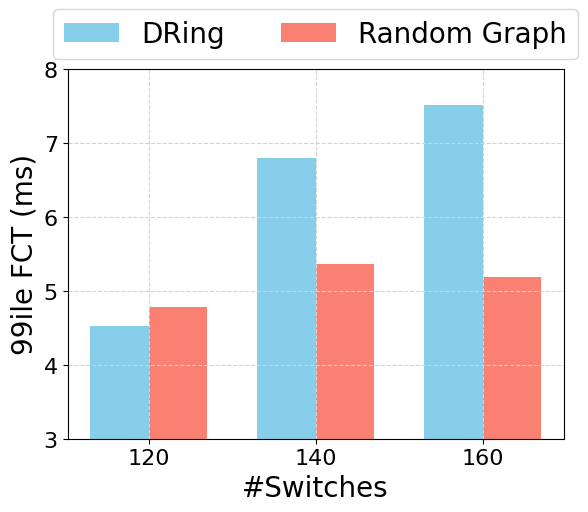

In [21]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Sample data
categories = swlist
values1 = dringylist  # Values for the first category
values2 = rrgylist   # Values for the second category

# Bar width
bar_width = 0.35

# Positions of bars on the x-axis
index = np.arange(len(categories))

# Create a bar plot
fig, ax = plt.subplots()

# Plot bars for the first category
bars1 = ax.bar(index - bar_width/2, values1, bar_width, label='DRing', color='skyblue') #, hatch='/')

# Plot bars for the second category
bars2 = ax.bar(index + bar_width/2, values2, bar_width, label='Random Graph', color='salmon') #, hatch='x')

# Add labels, title, and legend
ax.set_ylabel('99ile FCT (ms)',fontsize=20)
ax.set_xlabel('#Switches',fontsize=20)
# ax.set_title('Bar Plot with Two Categories')
ax.set_xticks(index)
ax.set_xticklabels(categories, fontsize=16)
ax.set_ylim(3,8)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
ax.grid(color='lightgrey', linestyle='dashed', axis="both")
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2), fontsize=20)

# Show the plot
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_scale_high.pdf", dpi=600, bbox_inches='tight')
plt.show()


In [21]:
# analysis, should comment out by default
swlist = [120,140,160]
graphname = "dring"
deg = 96
numpathlist = list()
for inumsw,numsw in enumerate(swlist):
    netpathfile = f"/home/annzhou/DRing/src/emp/datacentre/netpathfiles/scalability2/netpath_su3_{graphname}_{numsw*56}_{numsw}_{deg}"
    
    # read netpathfile
    netpath = list()
    numpath = list()
    for i in range(numsw):
        netpath.append(list())
        numpath.append(list())
        for j in range(numsw):
            netpath[i].append(0)
            numpath[i].append(0)
    with open(netpathfile,'r') as f:
        lines = f.readlines()
        # produce
        fromsw = 0
        tosw = 0
        for line in lines:
            if "->" not in line:
                tokens = line.split()
                fromsw = int(tokens[0])
                tosw = int(tokens[1])
                numpath[fromsw][tosw] = int(tokens[2])
            else:
                tokens = line.split()
                netpath[fromsw][tosw]+=len(tokens)

    mynumpathlist = list()
    for i in range(numsw):
        for j in range(numsw):
            if i!=j:
                mynumpathlist.append(netpath[i][j]/numpath[i][j])
    
    numpathlist.append(sum(mynumpathlist)/len(mynumpathlist))

print(numpathlist)

[2.9750330327579344, 3.0505678481884058, 3.169993276089211]


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

homedir = "/home/annzhou"
lssumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability3/dring.txt"
dringsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability3/dring.txt"
rrgsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability3/rrg.txt"
swlist = range(40,121,20)
sseedarr = range(1,6)

lsylist = list()
with open(lssumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        lsseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability3_leafspine_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    lsseedlist.append(n99fct)
        lsylist.append(sum(lsseedlist)/len(lsseedlist))

dringylist = list()
with open(dringsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability3_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))

rrgylist = list()
with open(rrgsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        rrgseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability3_rrg_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    rrgseedlist.append(n99fct)
        rrgylist.append(sum(rrgseedlist)/len(rrgseedlist))

/tmp/ipykernel_3461517/845908022.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


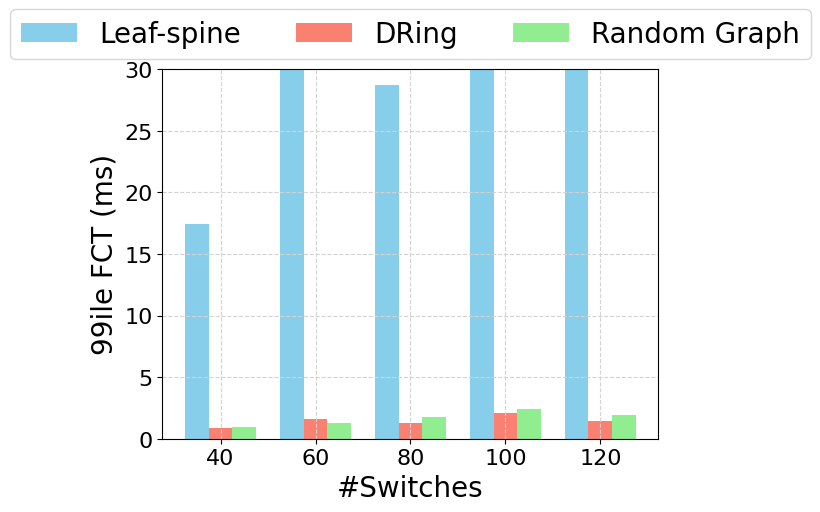

In [15]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Sample data
categories = swlist
values1 = lsylist  # Values for the first category
values2 = dringylist   # Values for the second category
values3 = rrgylist  # Values for the third category

# Bar width
bar_width = 0.25

# Positions of bars on the x-axis
index = np.arange(len(categories))

# Create a bar plot
fig, ax = plt.subplots()

# Plot bars for the first category
bars1 = ax.bar(index - bar_width, values1, bar_width, label='Leaf-spine', color='skyblue')

# Plot bars for the second category
bars2 = ax.bar(index, values2, bar_width, label='DRing', color='salmon')

# Plot bars for the third category
bars3 = ax.bar(index + bar_width, values3, bar_width, label='Random Graph', color='lightgreen')

# Add labels, title, and legend
ax.set_ylabel('99ile FCT (ms)',fontsize=20)
ax.set_xlabel('#Switches',fontsize=20)
# ax.set_title('Bar Plot with Three Different Colors')
ax.set_xticks(index)
ax.set_xticklabels(categories, fontsize=16)
ax.set_ylim(0,30)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
ax.grid(color='lightgrey', linestyle='dashed', axis="both")
ax.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.2), fontsize=20)

# Show the plot
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_scale_low.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [4]:
# # analysis, should comment out by default
# dringdifflist = list()
# rrgdifflist = list()
# for i in range(len(lsylist)):
#     ls = lsylist[i]
#     dring = dringylist[i]
#     rrg = rrgylist[i]
#     dringdifflist.append((ls-dring)/ls)
#     rrgdifflist.append((ls-rrg)/ls)
# print(sum(dringdifflist)/len(dringdifflist))
# print(sum(rrgdifflist)/len(rrgdifflist))

0.9691677924082869
0.9638378286399769


In [5]:
# # analysis, should comment out by default
# difflist=list()
# for i in range(len(lsylist)):
#     ls = lsylist[i]
#     dring = dringylist[i]
#     rrg = rrgylist[i]
#     difflist.append((dring-rrg)/rrg)
# print(sum(difflist)/len(difflist))

-0.089766472695509


In [16]:
# # analysis, should comment out by default
# swlist = range(40,121,20)
# dringserverlist = [752,1680,2992,4672,6720]
# graphname = "rrg"
# numpathlist = list()
# for inumsw,numsw in enumerate(swlist):
#     if graphname=="dring":
#         netpathfile = f"/home/annzhou/DRing/src/emp/datacentre/netpathfiles/scalability3/netpath_su3_dring_{dringserverlist[inumsw]}_{numsw}_{int(numsw*0.8)}"
#     elif graphname=="rrg":
#         netpathfile = f"/home/annzhou/DRing/src/emp/datacentre/netpathfiles/scalability3/netpath_su3_rrg_{(numsw//5)*(numsw//5)*12}_{numsw}_{int(numsw*0.8)}"
    
#     # read netpathfile
#     netpath = list()
#     numpath = list()
#     for i in range(numsw):
#         netpath.append(list())
#         numpath.append(list())
#         for j in range(numsw):
#             netpath[i].append(0)
#             numpath[i].append(0)
#     with open(netpathfile,'r') as f:
#         lines = f.readlines()
#         # produce
#         fromsw = 0
#         tosw = 0
#         for line in lines:
#             if "->" not in line:
#                 tokens = line.split()
#                 fromsw = int(tokens[0])
#                 tosw = int(tokens[1])
#                 numpath[fromsw][tosw] = int(tokens[2])
#             else:
#                 tokens = line.split()
#                 netpath[fromsw][tosw]+=len(tokens)

#     mynumpathlist = list()
#     for i in range(numsw):
#         for j in range(numsw):
#             if i!=j:
#                 mynumpathlist.append(netpath[i][j]/numpath[i][j])
    
#     numpathlist.append(sum(mynumpathlist)/len(mynumpathlist))

# print(numpathlist)

[2.905527870488154, 2.9409017666642767, 2.9571167292847305, 2.966324453276146, 2.972302525577586]
